In [3]:
import os 
import tensorflow as tf                                    # TensorFlow deep learning framework
import matplotlib.pyplot as plt                            # Plotting library
import matplotlib.image as mpimg                           # Image loading and manipulation library
import numpy as np
import cv2
from tensorflow.keras.models import Sequential, Model      # Sequential and Functional API for building models
from tensorflow.keras.optimizers import Adam               # Adam optimizer for model training
from tensorflow.keras.callbacks import EarlyStopping       # Early stopping callback for model training
from tensorflow.keras.regularizers import l1, l2           # L1 and L2 regularization for model regularization
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data augmentation and preprocessing for images
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D, AveragePooling2D, MaxPooling2D, BatchNormalization  
# Various types of layers for building neural networks
from tensorflow.keras.applications import DenseNet121, EfficientNetB4, Xception, VGG16, VGG19   # Pre-trained models for transfer learning



## PREPROCESSING DATA

In [5]:
import os
from PIL import Image

def resize_images_in_directory(source_directory, target_directory, target_size):
    """Resize semua gambar dalam direktori sumber dan simpan di direktori target."""
    
    # Buat direktori target jika belum ada
    if not os.path.exists(target_directory):
        os.makedirs(target_directory)

    for filename in os.listdir(source_directory):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Memeriksa format gambar yang valid
            source_image_path = os.path.join(source_directory, filename)
            target_image_path = os.path.join(target_directory, filename)  # Jalur untuk gambar yang diresize
            print(f"Membuka gambar: {filename}")
            try:
                # Membuka gambar
                img = Image.open(source_image_path)
                
                # Mengubah ukuran gambar
                img_resized = img.resize(target_size)
                
                # Menyimpan gambar yang sudah diresize di direktori target
                img_resized.save(target_image_path)
                print(f"Berhasil meresize: {filename} ke ukuran {img_resized.size}")
            except Exception as e:
                print(f"Terjadi kesalahan saat memproses {filename}: {e}")

# Ukuran target untuk resize
IMG_SIZE = (224, 224)  # Ukuran target diubah menjadi 224x224

# Contoh penggunaan
source_directory = r"D:/MATA KULIAH/Semester 5/PM/Project/FINAL PROJECT/project-PM-kel-05/dataset/train/red_devil"  # Ganti dengan jalur direktori sumber Anda
target_directory = r"D:/MATA KULIAH/Semester 5/PM/Project/FINAL PROJECT/project-PM-kel-05/dataresize/train/red_devil"  # Ganti dengan jalur direktori target Anda

resize_images_in_directory(source_directory, target_directory, IMG_SIZE)


Membuka gambar: Red-Devil-100_png_jpg.rf.0c5920be8f29987779da32ef29dd8425.jpg
Berhasil meresize: Red-Devil-100_png_jpg.rf.0c5920be8f29987779da32ef29dd8425.jpg ke ukuran (224, 224)
Membuka gambar: Red-Devil-100_png_jpg.rf.1610421bae99839a719dd2de04131ecd.jpg
Berhasil meresize: Red-Devil-100_png_jpg.rf.1610421bae99839a719dd2de04131ecd.jpg ke ukuran (224, 224)
Membuka gambar: Red-Devil-100_png_jpg.rf.30863fea2305a37b991f300b2cb5d79e.jpg
Berhasil meresize: Red-Devil-100_png_jpg.rf.30863fea2305a37b991f300b2cb5d79e.jpg ke ukuran (224, 224)
Membuka gambar: Red-Devil-100_png_jpg.rf.5c512a04897171cba1f2901d00605dba.jpg
Berhasil meresize: Red-Devil-100_png_jpg.rf.5c512a04897171cba1f2901d00605dba.jpg ke ukuran (224, 224)
Membuka gambar: Red-Devil-100_png_jpg.rf.8aeb162da08fec1cad4a3ae1f322a97c.jpg
Berhasil meresize: Red-Devil-100_png_jpg.rf.8aeb162da08fec1cad4a3ae1f322a97c.jpg ke ukuran (224, 224)
Membuka gambar: Red-Devil-101_png_jpg.rf.1c18c773230f4d273bb8c40692fcbf2f.jpg
Berhasil meresize: Red

In [6]:
import os
from PIL import Image

def resize_images_in_directory(source_directory, target_directory, target_size):
    """Resize semua gambar dalam direktori sumber dan simpan di direktori target."""
    
    # Buat direktori target jika belum ada
    if not os.path.exists(target_directory):
        os.makedirs(target_directory)

    for filename in os.listdir(source_directory):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Memeriksa format gambar yang valid
            source_image_path = os.path.join(source_directory, filename)
            target_image_path = os.path.join(target_directory, filename)  # Jalur untuk gambar yang diresize
            print(f"Membuka gambar: {filename}")
            try:
                # Membuka gambar
                img = Image.open(source_image_path)
                
                # Mengubah ukuran gambar
                img_resized = img.resize(target_size)
                
                # Menyimpan gambar yang sudah diresize di direktori target
                img_resized.save(target_image_path)
                print(f"Berhasil meresize: {filename} ke ukuran {img_resized.size}")
            except Exception as e:
                print(f"Terjadi kesalahan saat memproses {filename}: {e}")

# Ukuran target untuk resize
IMG_SIZE = (224, 224)  # Ukuran target diubah menjadi 224x224

# Contoh penggunaan
#train
source_directory = r"D:/MATA KULIAH/Semester 5/PM/Project/FINAL PROJECT/project-PM-kel-05/dataset/train/mujahir"  # Ganti dengan jalur direktori sumber Anda
target_directory = r"D:/MATA KULIAH/Semester 5/PM/Project/FINAL PROJECT/project-PM-kel-05/dataresize/train/mujahir"  # Ganti dengan jalur direktori target Anda

resize_images_in_directory(source_directory, target_directory, IMG_SIZE)

Membuka gambar: 5_mp4-0005_jpg.rf.f7ee63302e69d60ff399bec7b1be21c1.jpg
Berhasil meresize: 5_mp4-0005_jpg.rf.f7ee63302e69d60ff399bec7b1be21c1.jpg ke ukuran (224, 224)
Membuka gambar: 5_mp4-0006_jpg.rf.1c2e3ae2703ff07101fc1e578ef24eb9.jpg
Berhasil meresize: 5_mp4-0006_jpg.rf.1c2e3ae2703ff07101fc1e578ef24eb9.jpg ke ukuran (224, 224)
Membuka gambar: 5_mp4-0006_jpg.rf.1c40c81fd30afbcb4a03fd32cd5756fd.jpg
Berhasil meresize: 5_mp4-0006_jpg.rf.1c40c81fd30afbcb4a03fd32cd5756fd.jpg ke ukuran (224, 224)
Membuka gambar: 5_mp4-0006_jpg.rf.7f45763762785d904ad4fc38e0567d87.jpg
Berhasil meresize: 5_mp4-0006_jpg.rf.7f45763762785d904ad4fc38e0567d87.jpg ke ukuran (224, 224)
Membuka gambar: 5_mp4-0006_jpg.rf.a7be1385e428a54aa4d232347a651977.jpg
Berhasil meresize: 5_mp4-0006_jpg.rf.a7be1385e428a54aa4d232347a651977.jpg ke ukuran (224, 224)
Membuka gambar: 5_mp4-0006_jpg.rf.a9624daaf2a36b5a25a7fef0e45bd77d.jpg
Berhasil meresize: 5_mp4-0006_jpg.rf.a9624daaf2a36b5a25a7fef0e45bd77d.jpg ke ukuran (224, 224)
Memb

In [7]:
import os
from PIL import Image

def resize_images_in_directory(source_directory, target_directory, target_size):
    """Resize semua gambar dalam direktori sumber dan simpan di direktori target."""
    
    # Buat direktori target jika belum ada
    if not os.path.exists(target_directory):
        os.makedirs(target_directory)

    for filename in os.listdir(source_directory):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Memeriksa format gambar yang valid
            source_image_path = os.path.join(source_directory, filename)
            target_image_path = os.path.join(target_directory, filename)  # Jalur untuk gambar yang diresize
            print(f"Membuka gambar: {filename}")
            try:
                # Membuka gambar
                img = Image.open(source_image_path)
                
                # Mengubah ukuran gambar
                img_resized = img.resize(target_size)
                
                # Menyimpan gambar yang sudah diresize di direktori target
                img_resized.save(target_image_path)
                print(f"Berhasil meresize: {filename} ke ukuran {img_resized.size}")
            except Exception as e:
                print(f"Terjadi kesalahan saat memproses {filename}: {e}")

# Ukuran target untuk resize
IMG_SIZE = (224, 224)  # Ukuran target diubah menjadi 224x224


# Contoh penggunaan
#train

source_directory = r"D:/MATA KULIAH/Semester 5/PM/Project/FINAL PROJECT/project-PM-kel-05/dataset/train/sepat"  # Ganti dengan jalur direktori sumber Anda
target_directory = r"D:/MATA KULIAH/Semester 5/PM/Project/FINAL PROJECT/project-PM-kel-05/dataresize/train/sepat"  # Ganti dengan jalur direktori target Anda



resize_images_in_directory(source_directory, target_directory, IMG_SIZE)

Membuka gambar: Sepat-100_png_jpg.rf.0d09e2c1e3c8fd8c9ce7b373764ce5d4.jpg
Berhasil meresize: Sepat-100_png_jpg.rf.0d09e2c1e3c8fd8c9ce7b373764ce5d4.jpg ke ukuran (224, 224)
Membuka gambar: Sepat-100_png_jpg.rf.2f0942275b79ffa4a70a90661068bbbf.jpg
Berhasil meresize: Sepat-100_png_jpg.rf.2f0942275b79ffa4a70a90661068bbbf.jpg ke ukuran (224, 224)
Membuka gambar: Sepat-100_png_jpg.rf.56941906d8f2828a1b31b482b707bd5e.jpg
Berhasil meresize: Sepat-100_png_jpg.rf.56941906d8f2828a1b31b482b707bd5e.jpg ke ukuran (224, 224)
Membuka gambar: Sepat-100_png_jpg.rf.632f2a1f8cce19954bfb523eda09ca4b.jpg
Berhasil meresize: Sepat-100_png_jpg.rf.632f2a1f8cce19954bfb523eda09ca4b.jpg ke ukuran (224, 224)
Membuka gambar: Sepat-100_png_jpg.rf.7083508af68a459b261d10efa88202ec.jpg
Berhasil meresize: Sepat-100_png_jpg.rf.7083508af68a459b261d10efa88202ec.jpg ke ukuran (224, 224)
Membuka gambar: Sepat-100_png_jpg.rf.77e3840a1b403499506142643d758b3b.jpg
Berhasil meresize: Sepat-100_png_jpg.rf.77e3840a1b403499506142643d

In [9]:
import os
from PIL import Image

def resize_images_in_directory(source_directory, target_directory, target_size):
    """Resize semua gambar dalam direktori sumber dan simpan di direktori target."""
    
    # Buat direktori target jika belum ada
    if not os.path.exists(target_directory):
        os.makedirs(target_directory)

    for filename in os.listdir(source_directory):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Memeriksa format gambar yang valid
            source_image_path = os.path.join(source_directory, filename)
            target_image_path = os.path.join(target_directory, filename)  # Jalur untuk gambar yang diresize
            print(f"Membuka gambar: {filename}")
            try:
                # Membuka gambar
                img = Image.open(source_image_path)
                
                # Mengubah ukuran gambar
                img_resized = img.resize(target_size)
                
                # Menyimpan gambar yang sudah diresize di direktori target
                img_resized.save(target_image_path)
                print(f"Berhasil meresize: {filename} ke ukuran {img_resized.size}")
            except Exception as e:
                print(f"Terjadi kesalahan saat memproses {filename}: {e}")
# Ukuran target untuk resize
IMG_SIZE = (224, 224)  # Ukuran target diubah menjadi 224x224

# Contoh penggunaan
#train
source_directory = r"D:/MATA KULIAH/Semester 5/PM/Project/FINAL PROJECT/project-PM-kel-05/dataset/test/red_devil"  # Ganti dengan jalur direktori sumber Anda
target_directory = r"D:/MATA KULIAH/Semester 5/PM/Project/FINAL PROJECT/project-PM-kel-05/dataresize/test/red_devil"  # Ganti dengan jalur direktori target Anda




resize_images_in_directory(source_directory, target_directory, IMG_SIZE)

Membuka gambar: Red-Devil-101_png_jpg.rf.d9ed07b6e68c3e93176715b0010a3e33.jpg
Berhasil meresize: Red-Devil-101_png_jpg.rf.d9ed07b6e68c3e93176715b0010a3e33.jpg ke ukuran (224, 224)
Membuka gambar: Red-Devil-104_png_jpg.rf.f98dbbec37a56d0a59d7e05f5344b89b.jpg
Berhasil meresize: Red-Devil-104_png_jpg.rf.f98dbbec37a56d0a59d7e05f5344b89b.jpg ke ukuran (224, 224)
Membuka gambar: Red-Devil-105_png_jpg.rf.b1efa865a6a211728f411c07d75584a5.jpg
Berhasil meresize: Red-Devil-105_png_jpg.rf.b1efa865a6a211728f411c07d75584a5.jpg ke ukuran (224, 224)
Membuka gambar: Red-Devil-109_png_jpg.rf.7d9224c65e66461b159bda0982f45d7f.jpg
Berhasil meresize: Red-Devil-109_png_jpg.rf.7d9224c65e66461b159bda0982f45d7f.jpg ke ukuran (224, 224)
Membuka gambar: Red-Devil-122_png_jpg.rf.aa35b61ed0b16c3834001f5945a8fc38.jpg
Berhasil meresize: Red-Devil-122_png_jpg.rf.aa35b61ed0b16c3834001f5945a8fc38.jpg ke ukuran (224, 224)
Membuka gambar: Red-Devil-132_png_jpg.rf.ae8fcd7bc96bbea6375168be5bcc857c.jpg
Berhasil meresize: Red

In [11]:
import os
from PIL import Image

def resize_images_in_directory(source_directory, target_directory, target_size):
    """Resize semua gambar dalam direktori sumber dan simpan di direktori target."""
    
    # Buat direktori target jika belum ada
    if not os.path.exists(target_directory):
        os.makedirs(target_directory)

    for filename in os.listdir(source_directory):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Memeriksa format gambar yang valid
            source_image_path = os.path.join(source_directory, filename)
            target_image_path = os.path.join(target_directory, filename)  # Jalur untuk gambar yang diresize
            print(f"Membuka gambar: {filename}")
            try:
                # Membuka gambar
                img = Image.open(source_image_path)
                
                # Mengubah ukuran gambar
                img_resized = img.resize(target_size)
                
                # Menyimpan gambar yang sudah diresize di direktori target
                img_resized.save(target_image_path)
                print(f"Berhasil meresize: {filename} ke ukuran {img_resized.size}")
            except Exception as e:
                print(f"Terjadi kesalahan saat memproses {filename}: {e}")

# Ukuran target untuk resize
IMG_SIZE = (224, 224)  # Ukuran target diubah menjadi 224x224

# Contoh penggunaan
#train
source_directory = r"D:/MATA KULIAH/Semester 5/PM/Project/FINAL PROJECT/project-PM-kel-05/dataset/test/mujahir"  # Ganti dengan jalur direktori sumber Anda
target_directory = r"D:/MATA KULIAH/Semester 5/PM/Project/FINAL PROJECT/project-PM-kel-05/dataresize/test/mujahir"  # Ganti dengan jalur direktori target Anda




resize_images_in_directory(source_directory, target_directory, IMG_SIZE)

Membuka gambar: 1_mp4-0012_jpg.rf.af408cddf66ccba558575e67d654671a.jpg
Berhasil meresize: 1_mp4-0012_jpg.rf.af408cddf66ccba558575e67d654671a.jpg ke ukuran (224, 224)
Membuka gambar: 3_mp4-0001_jpg.rf.78c9387cea52f16b363b97e29b2224b4.jpg
Berhasil meresize: 3_mp4-0001_jpg.rf.78c9387cea52f16b363b97e29b2224b4.jpg ke ukuran (224, 224)
Membuka gambar: 3_mp4-0007_jpg.rf.bad24d31e5fd7ac75000cc3bfa89e488.jpg
Berhasil meresize: 3_mp4-0007_jpg.rf.bad24d31e5fd7ac75000cc3bfa89e488.jpg ke ukuran (224, 224)
Membuka gambar: 3_mp4-0009_jpg.rf.7a6de95452636bd2a742b23d4faf81cd.jpg
Berhasil meresize: 3_mp4-0009_jpg.rf.7a6de95452636bd2a742b23d4faf81cd.jpg ke ukuran (224, 224)
Membuka gambar: 5_mp4-0015_jpg.rf.09ab1aaf6b49190b804d1e3d04cbcbc0.jpg
Berhasil meresize: 5_mp4-0015_jpg.rf.09ab1aaf6b49190b804d1e3d04cbcbc0.jpg ke ukuran (224, 224)
Membuka gambar: 6_mp4-0000_jpg.rf.977683a3c9107b8fb33a5b971cbebd3b.jpg
Berhasil meresize: 6_mp4-0000_jpg.rf.977683a3c9107b8fb33a5b971cbebd3b.jpg ke ukuran (224, 224)
Memb

In [12]:
import os
from PIL import Image

def resize_images_in_directory(source_directory, target_directory, target_size):
    """Resize semua gambar dalam direktori sumber dan simpan di direktori target."""
    
    # Buat direktori target jika belum ada
    if not os.path.exists(target_directory):
        os.makedirs(target_directory)

    for filename in os.listdir(source_directory):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Memeriksa format gambar yang valid
            source_image_path = os.path.join(source_directory, filename)
            target_image_path = os.path.join(target_directory, filename)  # Jalur untuk gambar yang diresize
            print(f"Membuka gambar: {filename}")
            try:
                # Membuka gambar
                img = Image.open(source_image_path)
                
                # Mengubah ukuran gambar
                img_resized = img.resize(target_size)
                
                # Menyimpan gambar yang sudah diresize di direktori target
                img_resized.save(target_image_path)
                print(f"Berhasil meresize: {filename} ke ukuran {img_resized.size}")
            except Exception as e:
                print(f"Terjadi kesalahan saat memproses {filename}: {e}")

# Ukuran target untuk resize
IMG_SIZE = (224, 224)  # Ukuran target diubah menjadi 224x224

# Contoh penggunaan
#train
source_directory = r"D:/MATA KULIAH/Semester 5/PM/Project/FINAL PROJECT/project-PM-kel-05/dataset/test/sepat"  # Ganti dengan jalur direktori sumber Anda
target_directory = r"D:/MATA KULIAH/Semester 5/PM/Project/FINAL PROJECT/project-PM-kel-05/dataresize/test/sepat"  # Ganti dengan jalur direktori target Anda




resize_images_in_directory(source_directory, target_directory, IMG_SIZE)

Membuka gambar: Sepat-104_png_jpg.rf.c8efe00703ee19d384763c8a05f1b4f6.jpg
Berhasil meresize: Sepat-104_png_jpg.rf.c8efe00703ee19d384763c8a05f1b4f6.jpg ke ukuran (224, 224)
Membuka gambar: Sepat-105_png_jpg.rf.e07125ea47295be33fcbe35134c37fc6.jpg
Berhasil meresize: Sepat-105_png_jpg.rf.e07125ea47295be33fcbe35134c37fc6.jpg ke ukuran (224, 224)
Membuka gambar: Sepat-115_png_jpg.rf.10ef20970ea1c9e1857d1192fa523831.jpg
Berhasil meresize: Sepat-115_png_jpg.rf.10ef20970ea1c9e1857d1192fa523831.jpg ke ukuran (224, 224)
Membuka gambar: Sepat-117_png_jpg.rf.dfe4e7f8212150cc64d5ddef0e09aaf1.jpg
Berhasil meresize: Sepat-117_png_jpg.rf.dfe4e7f8212150cc64d5ddef0e09aaf1.jpg ke ukuran (224, 224)
Membuka gambar: Sepat-15_png_jpg.rf.29fb2d9e7813596912e320f4e4017b8a.jpg
Berhasil meresize: Sepat-15_png_jpg.rf.29fb2d9e7813596912e320f4e4017b8a.jpg ke ukuran (224, 224)
Membuka gambar: Sepat-16_png_jpg.rf.eeed7dcbc9bb558bc6056c1e9964eb61.jpg
Berhasil meresize: Sepat-16_png_jpg.rf.eeed7dcbc9bb558bc6056c1e9964eb

In [13]:
import os
from PIL import Image

def resize_images_in_directory(source_directory, target_directory, target_size):
    """Resize semua gambar dalam direktori sumber dan simpan di direktori target."""
    
    # Buat direktori target jika belum ada
    if not os.path.exists(target_directory):
        os.makedirs(target_directory)

    for filename in os.listdir(source_directory):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Memeriksa format gambar yang valid
            source_image_path = os.path.join(source_directory, filename)
            target_image_path = os.path.join(target_directory, filename)  # Jalur untuk gambar yang diresize
            print(f"Membuka gambar: {filename}")
            try:
                # Membuka gambar
                img = Image.open(source_image_path)
                
                # Mengubah ukuran gambar
                img_resized = img.resize(target_size)
                
                # Menyimpan gambar yang sudah diresize di direktori target
                img_resized.save(target_image_path)
                print(f"Berhasil meresize: {filename} ke ukuran {img_resized.size}")
            except Exception as e:
                print(f"Terjadi kesalahan saat memproses {filename}: {e}")

# Ukuran target untuk resize
IMG_SIZE = (224, 224)  # Ukuran target diubah menjadi 224x224

# Contoh penggunaan
#train
source_directory = r"D:/MATA KULIAH/Semester 5/PM/Project/FINAL PROJECT/project-PM-kel-05/dataset/valid/mujahir"  # Ganti dengan jalur direktori sumber Anda
target_directory = r"D:/MATA KULIAH/Semester 5/PM/Project/FINAL PROJECT/project-PM-kel-05/dataresize/valid/mujahir"  # Ganti dengan jalur direktori target Anda




resize_images_in_directory(source_directory, target_directory, IMG_SIZE)

Membuka gambar: 1_mp4-0010_jpg.rf.a253b9822a2ffe07477556491ed156d4.jpg
Berhasil meresize: 1_mp4-0010_jpg.rf.a253b9822a2ffe07477556491ed156d4.jpg ke ukuran (224, 224)
Membuka gambar: 1_mp4-0014_jpg.rf.3e6bdaa04a1f38cc2bcc67c27dcd695c.jpg
Berhasil meresize: 1_mp4-0014_jpg.rf.3e6bdaa04a1f38cc2bcc67c27dcd695c.jpg ke ukuran (224, 224)
Membuka gambar: 2_mp4-0000_jpg.rf.030d3fea0b6d5deed1ec4a550195920b.jpg
Berhasil meresize: 2_mp4-0000_jpg.rf.030d3fea0b6d5deed1ec4a550195920b.jpg ke ukuran (224, 224)
Membuka gambar: 2_mp4-0000_jpg.rf.1a9b5099ac429f4d2cf0ab0ae6ff0490.jpg
Berhasil meresize: 2_mp4-0000_jpg.rf.1a9b5099ac429f4d2cf0ab0ae6ff0490.jpg ke ukuran (224, 224)
Membuka gambar: 2_mp4-0001_jpg.rf.d8a0b07be6d4d5b8903070ba5992c36b.jpg
Berhasil meresize: 2_mp4-0001_jpg.rf.d8a0b07be6d4d5b8903070ba5992c36b.jpg ke ukuran (224, 224)
Membuka gambar: 2_mp4-0002_jpg.rf.04031711caf4cf5995fd72810a0ace58.jpg
Berhasil meresize: 2_mp4-0002_jpg.rf.04031711caf4cf5995fd72810a0ace58.jpg ke ukuran (224, 224)
Memb

In [16]:
import os
from PIL import Image

def resize_images_in_directory(source_directory, target_directory, target_size):
    """Resize semua gambar dalam direktori sumber dan simpan di direktori target."""
    
    # Buat direktori target jika belum ada
    if not os.path.exists(target_directory):
        os.makedirs(target_directory)

    for filename in os.listdir(source_directory):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Memeriksa format gambar yang valid
            source_image_path = os.path.join(source_directory, filename)
            target_image_path = os.path.join(target_directory, filename)  # Jalur untuk gambar yang diresize
            print(f"Membuka gambar: {filename}")
            try:
                # Membuka gambar
                img = Image.open(source_image_path)
                
                # Mengubah ukuran gambar
                img_resized = img.resize(target_size)
                
                # Menyimpan gambar yang sudah diresize di direktori target
                img_resized.save(target_image_path)
                print(f"Berhasil meresize: {filename} ke ukuran {img_resized.size}")
            except Exception as e:
                print(f"Terjadi kesalahan saat memproses {filename}: {e}")


# Ukuran target untuk resize
IMG_SIZE = (224, 224)  # Ukuran target diubah menjadi 224x224

# Contoh penggunaan
#train
source_directory = r"D:/MATA KULIAH/Semester 5/PM/Project/FINAL PROJECT/project-PM-kel-05/dataset/valid/red_devil"  # Ganti dengan jalur direktori sumber Anda
target_directory = r"D:/MATA KULIAH/Semester 5/PM/Project/FINAL PROJECT/project-PM-kel-05/dataresize/valid/red_devil"  # Ganti dengan jalur direktori target Anda




resize_images_in_directory(source_directory, target_directory, IMG_SIZE)

Membuka gambar: Red-Devil-100_png_jpg.rf.92e68271dacbb3fc916b3903e6908b5c.jpg
Berhasil meresize: Red-Devil-100_png_jpg.rf.92e68271dacbb3fc916b3903e6908b5c.jpg ke ukuran (224, 224)
Membuka gambar: Red-Devil-106_png_jpg.rf.67633bac430edaa9bc5027ef07a5ca5a.jpg
Berhasil meresize: Red-Devil-106_png_jpg.rf.67633bac430edaa9bc5027ef07a5ca5a.jpg ke ukuran (224, 224)
Membuka gambar: Red-Devil-108_png_jpg.rf.3d60f33c167fb86fbdb3d556b510ec2e.jpg
Berhasil meresize: Red-Devil-108_png_jpg.rf.3d60f33c167fb86fbdb3d556b510ec2e.jpg ke ukuran (224, 224)
Membuka gambar: Red-Devil-110_png_jpg.rf.5e457d45d6fae8f94fb2b30597aaf0e7.jpg
Berhasil meresize: Red-Devil-110_png_jpg.rf.5e457d45d6fae8f94fb2b30597aaf0e7.jpg ke ukuran (224, 224)
Membuka gambar: Red-Devil-110_png_jpg.rf.7a6e679ccbe293a75f57d11b7c565161.jpg
Berhasil meresize: Red-Devil-110_png_jpg.rf.7a6e679ccbe293a75f57d11b7c565161.jpg ke ukuran (224, 224)
Membuka gambar: Red-Devil-114_png_jpg.rf.dbe9bacaf3415bab6caa6583d696119c.jpg
Berhasil meresize: Red

In [18]:
import os
from PIL import Image

def resize_images_in_directory(source_directory, target_directory, target_size):
    """Resize semua gambar dalam direktori sumber dan simpan di direktori target."""
    
    # Buat direktori target jika belum ada
    if not os.path.exists(target_directory):
        os.makedirs(target_directory)

    for filename in os.listdir(source_directory):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Memeriksa format gambar yang valid
            source_image_path = os.path.join(source_directory, filename)
            target_image_path = os.path.join(target_directory, filename)  # Jalur untuk gambar yang diresize
            print(f"Membuka gambar: {filename}")
            try:
                # Membuka gambar
                img = Image.open(source_image_path)
                
                # Mengubah ukuran gambar
                img_resized = img.resize(target_size)
                
                # Menyimpan gambar yang sudah diresize di direktori target
                img_resized.save(target_image_path)
                print(f"Berhasil meresize: {filename} ke ukuran {img_resized.size}")
            except Exception as e:
                print(f"Terjadi kesalahan saat memproses {filename}: {e}")

# Ukuran target untuk resize
IMG_SIZE = (224, 224)  # Ukuran target diubah menjadi 224x224

# Contoh penggunaan
#train
source_directory = r"D:/MATA KULIAH/Semester 5/PM/Project/FINAL PROJECT/project-PM-kel-05/dataset/valid/sepat"  # Ganti dengan jalur direktori sumber Anda
target_directory = r"D:/MATA KULIAH/Semester 5/PM/Project/FINAL PROJECT/project-PM-kel-05/dataresize/valid/sepat"  # Ganti dengan jalur direktori target Anda




resize_images_in_directory(source_directory, target_directory, IMG_SIZE)

Membuka gambar: Sepat-101_png_jpg.rf.65b12d2947985e6e1dfe2e91a8ff90d4.jpg
Berhasil meresize: Sepat-101_png_jpg.rf.65b12d2947985e6e1dfe2e91a8ff90d4.jpg ke ukuran (224, 224)
Membuka gambar: Sepat-104_png_jpg.rf.b1a77e9201a89111994b25835bf655db.jpg
Berhasil meresize: Sepat-104_png_jpg.rf.b1a77e9201a89111994b25835bf655db.jpg ke ukuran (224, 224)
Membuka gambar: Sepat-108_png_jpg.rf.874716ecfb5d9a204f5f5a722e29e1d5.jpg
Berhasil meresize: Sepat-108_png_jpg.rf.874716ecfb5d9a204f5f5a722e29e1d5.jpg ke ukuran (224, 224)
Membuka gambar: Sepat-109_png_jpg.rf.e1eeb3bfec312b6b66c639787521a1ea.jpg
Berhasil meresize: Sepat-109_png_jpg.rf.e1eeb3bfec312b6b66c639787521a1ea.jpg ke ukuran (224, 224)
Membuka gambar: Sepat-114_png_jpg.rf.00a8ef39c29fab6a4ed5b761884b819e.jpg
Berhasil meresize: Sepat-114_png_jpg.rf.00a8ef39c29fab6a4ed5b761884b819e.jpg ke ukuran (224, 224)
Membuka gambar: Sepat-114_png_jpg.rf.a17e804c6ab46b42879f5f5dd2b56d89.jpg
Berhasil meresize: Sepat-114_png_jpg.rf.a17e804c6ab46b42879f5f5dd2

## Image Processing

In [25]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Define IMG_SIZE
IMG_SIZE = (224, 224)  # Sesuaikan dengan model Anda

def preprocess_and_save_images(input_dir, output_dir):
    """
    Preprocess semua gambar dalam folder input_dir dan simpan hasil ke output_dir.
    """
    # Loop melalui semua subdirektori (kelas)
    for class_name in os.listdir(input_dir):
        class_path = os.path.join(input_dir, class_name)
        
        # Pastikan ini adalah folder
        if not os.path.isdir(class_path):
            continue
        
        # Buat folder output jika belum ada
        output_class_path = os.path.join(output_dir, class_name)
        os.makedirs(output_class_path, exist_ok=True)
        
        # Proses setiap gambar di folder kelas
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            
            # Baca dan preprocess gambar
            img = cv2.imread(img_path)
            if img is None:
                print(f"Skip: {img_path} (invalid image)")
                continue
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, IMG_SIZE)
            
            # Edge detection
            kernel_edge = np.array([[-1, -1, -1],
                                     [-1,  8, -1],
                                     [-1, -1, -1]])
            edges = cv2.filter2D(img, -1, kernel_edge)
            
            # Sharpening
            kernel_sharpen = np.array([[0, -1, 0],
                                        [-1,  5, -1],
                                        [0, -1, 0]])
            sharpened = cv2.filter2D(img, -1, kernel_sharpen)
            
            # Simpan gambar yang sudah diproses
            processed_img = cv2.cvtColor(sharpened, cv2.COLOR_RGB2BGR)  # Kembali ke BGR untuk penyimpanan
            output_path = os.path.join(output_class_path, img_name)
            cv2.imwrite(output_path, processed_img)
            print(f"Processed and saved: {output_path}")

# Path ke dataset
train_dir = "dataresize/train"
valid_dir = "dataresize/valid"
test_dir = "dataresize/test"

# Path output hasil preprocess
output_train_dir = "processed_dataset/train"
output_valid_dir = "processed_dataset/valid"
output_test_dir = "processed_dataset/test"

# Preprocess semua gambar
preprocess_and_save_images(train_dir, output_train_dir)
preprocess_and_save_images(valid_dir, output_valid_dir)
preprocess_and_save_images(test_dir, output_test_dir)


Processed and saved: processed_dataset/train\mujahir\5_mp4-0005_jpg.rf.f7ee63302e69d60ff399bec7b1be21c1.jpg
Processed and saved: processed_dataset/train\mujahir\5_mp4-0006_jpg.rf.1c2e3ae2703ff07101fc1e578ef24eb9.jpg
Processed and saved: processed_dataset/train\mujahir\5_mp4-0006_jpg.rf.1c40c81fd30afbcb4a03fd32cd5756fd.jpg
Processed and saved: processed_dataset/train\mujahir\5_mp4-0006_jpg.rf.7f45763762785d904ad4fc38e0567d87.jpg
Processed and saved: processed_dataset/train\mujahir\5_mp4-0006_jpg.rf.a7be1385e428a54aa4d232347a651977.jpg
Processed and saved: processed_dataset/train\mujahir\5_mp4-0006_jpg.rf.a9624daaf2a36b5a25a7fef0e45bd77d.jpg
Processed and saved: processed_dataset/train\mujahir\5_mp4-0006_jpg.rf.b2c86c9de39091c1cb205d4cb27e60a9.jpg
Processed and saved: processed_dataset/train\mujahir\5_mp4-0006_jpg.rf.c722218f37f3d6f76a0badf0d5896ef4.jpg
Processed and saved: processed_dataset/train\mujahir\5_mp4-0006_jpg.rf.d7a5dbcff47c3da79e04179f056a783f.jpg
Processed and saved: process

## PERSIAPAN DATA SET DAN NORMALISASI DATA

In [55]:
train_data = tf.keras.utils.image_dataset_from_directory(
    'processed_dataset/train',
    labels='inferred',
    label_mode='categorical',
    image_size=(224, 224),
    batch_size=32)

train_data = train_data.map(lambda x, y: (x / 255.0, y))





Found 2721 files belonging to 3 classes.


In [57]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    'processed_dataset/valid',
    labels='inferred',
    label_mode='categorical',
    image_size=(224, 224),
    batch_size=32)


val_data = val_data.map(lambda x, y: (x / 255.0, y))


Found 246 files belonging to 3 classes.


In [59]:
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    'processed_dataset/test',
    labels='inferred',
    label_mode='categorical',
    image_size=(224, 224),
    batch_size=32)

test_data = test_data.map(lambda x, y: (x / 255.0, y))



Found 99 files belonging to 3 classes.


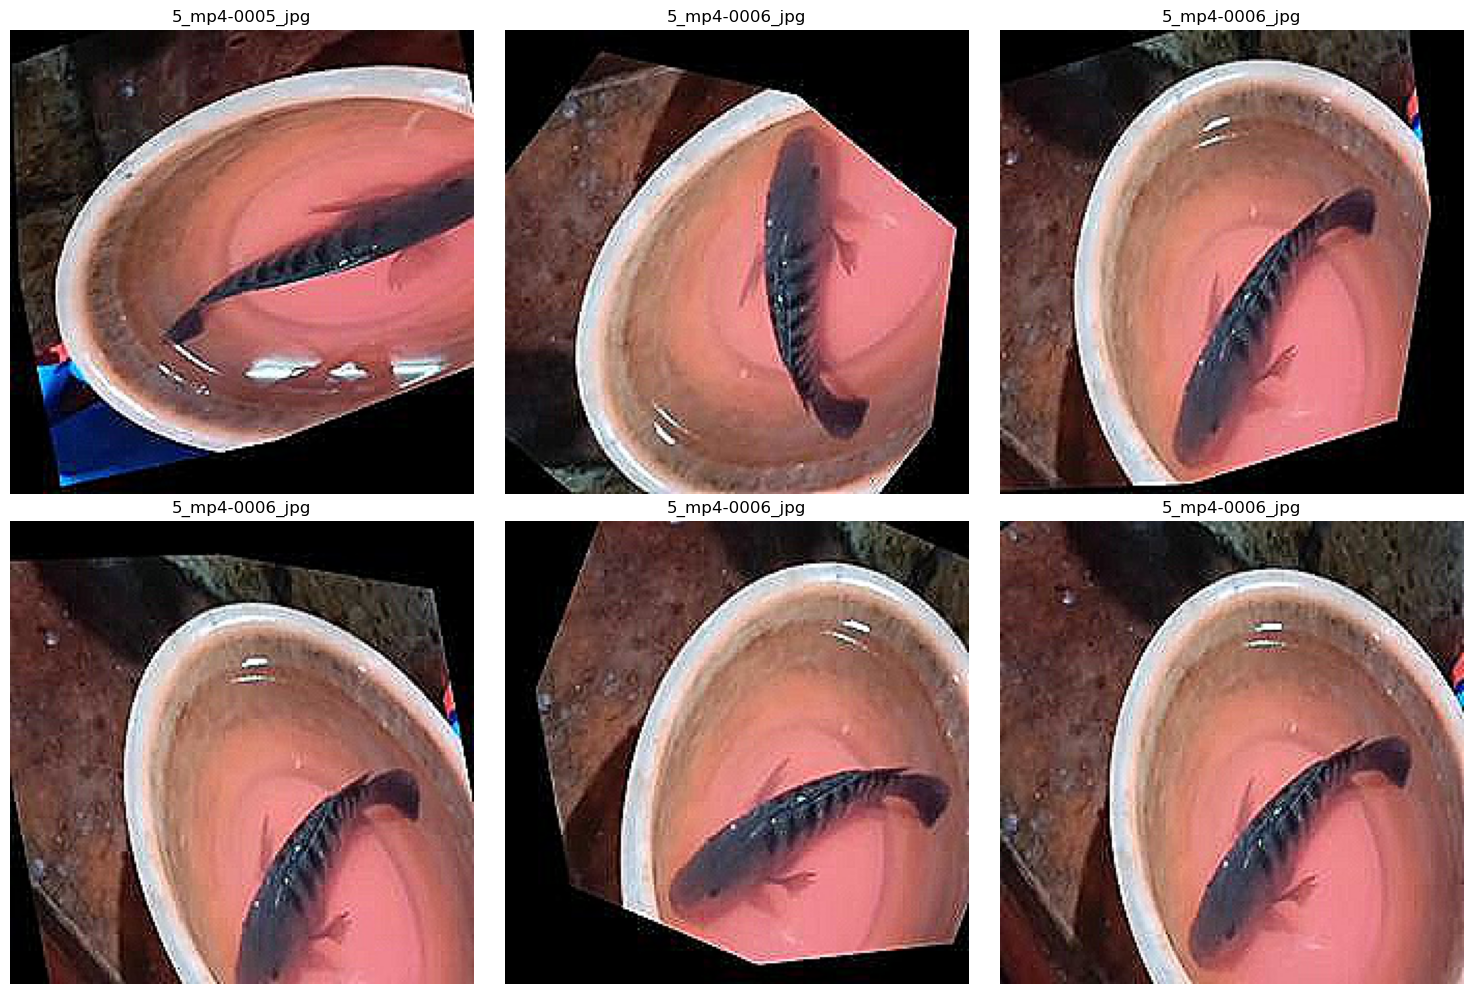

In [61]:

# Path to the directory containing images
path = "processed_dataset/train/mujahir"

# Get a list of all image file names in the directory
image_files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

# Display the first 6 images with their labels
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i in range(6):
    # Get the image file name and its label
    image_file = image_files[i]
    label = image_file.split('.')[0]

    # Load and display the image
    img_path = os.path.join(path, image_file)
    img = mpimg.imread(img_path)
    ax = axs[i // 3, i % 3]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(label)

plt.tight_layout()
plt.show()

## AUGMENTASI DATA

In [63]:
# Custom ImageDataGenerator
class CustomImageDataGenerator(ImageDataGenerator):
    def preprocessing_function(self, img):
        return image_preprocessing(img)


In [65]:

# Data Generators dengan preprocessing
train_datagen = CustomImageDataGenerator(
    rescale=1.0 / 255.0,
    zoom_range=0.3,
    brightness_range=[0.6, 1.4]
)

validation_datagen = CustomImageDataGenerator(rescale=1.0 / 255.0)
test_datagen = CustomImageDataGenerator(rescale=1.0 / 255.0)

## Arsitektur DenseNet121 CNN [ feature extractor ]

In [67]:
conv_base = DenseNet121(
    weights='imagenet',
    include_top = False,
    input_shape=(224,224,3),
    pooling='avg'
)

In [69]:
conv_base.trainable = False

In [71]:
conv_base.summary()

Model: "densenet121"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d_2              │ (None, 230, 230, 3)       │               0 │ input_layer_2[0][0]        │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,408 │ zero_padding2d_2[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d_3              │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1 (MaxPooling2D)          │ (None, 56, 56, 64)        │               0 │ zero_padding2d_3[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_bn             │ (None, 56, 56, 64)        │             256 │ pool1[0][0]                │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_0_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 128)       │           8,192 │ conv2_block1_0_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 128)       │             512 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 128)       │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 32)        │          36,864 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_concat           │ (None, 56, 56, 96)        │               0 │ pool1[0][0],               │
│ (Concatenate)                 │                           │               

 Total params: 7,037,504 (26.85 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 7,037,504 (26.85 MB)

## MODEL CNN  Menggunakan Hyper Paramatertunning

In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()

# Menambahkan DenseNet121 sebagai feature extractor
model.add(conv_base)

# Normalisasi Batch
model.add(BatchNormalization())

# Dense layer pertama
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))  # Dropout untuk mengurangi overfitting
model.add(BatchNormalization())

# Dense layer kedua
model.add(Dense(128, activation='relu'))

# Output layer untuk 3 kelas
model.add(Dense(3, activation='softmax'))

# Kompilasi model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Ringkasan model
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)             │ (None, 1024)                │       7,037,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,338,307 (27.99 MB)

 Trainable params: 298,243 (1.14 MB)

 Non-trainable params: 7,040,064 (26.86 MB)

In [75]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [77]:
# history = model.fit(train_ds,epochs=10,validation_data=validation_ds)
history = model.fit(train_data, epochs=25, validation_data=val_data, callbacks=[EarlyStopping(patience=3)])

Epoch 1/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 280s 2s/step - accuracy: 0.5713 - loss: 0.9761 - val_accuracy: 0.9106 - val_loss: 0.3820
Epoch 2/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 215s 3s/step - accuracy: 0.9548 - loss: 0.1929 - val_accuracy: 0.9675 - val_loss: 0.1691
Epoch 3/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 196s 2s/step - accuracy: 0.9816 - loss: 0.1051 - val_accuracy: 0.9837 - val_loss: 0.1003
Epoch 4/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 185s 2s/step - accuracy: 0.9829 - loss: 0.0722 - val_accuracy: 0.9878 - val_loss: 0.0721
Epoch 5/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 186s 2s/step - accuracy: 0.9945 - loss: 0.0454 - val_accuracy: 0.9878 - val_loss: 0.0578
Epoch 6/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 192s 2s/step - accuracy: 0.9942 - loss: 0.0328 - val_accuracy: 0.9878 - val_loss: 0.0534
Epoch 7/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 183s 2s/step - accuracy: 0.9968 - loss: 0.0319 - val_accuracy: 0.9837 - val_loss: 0.0499
Epoch 8/25
86/86 ━━━━━━━━━━━━━━━━━━━━ 196s 2s/step - accuracy: 0.9968 - loss: 0.0246 - val_accuracy: 0.9878 - v

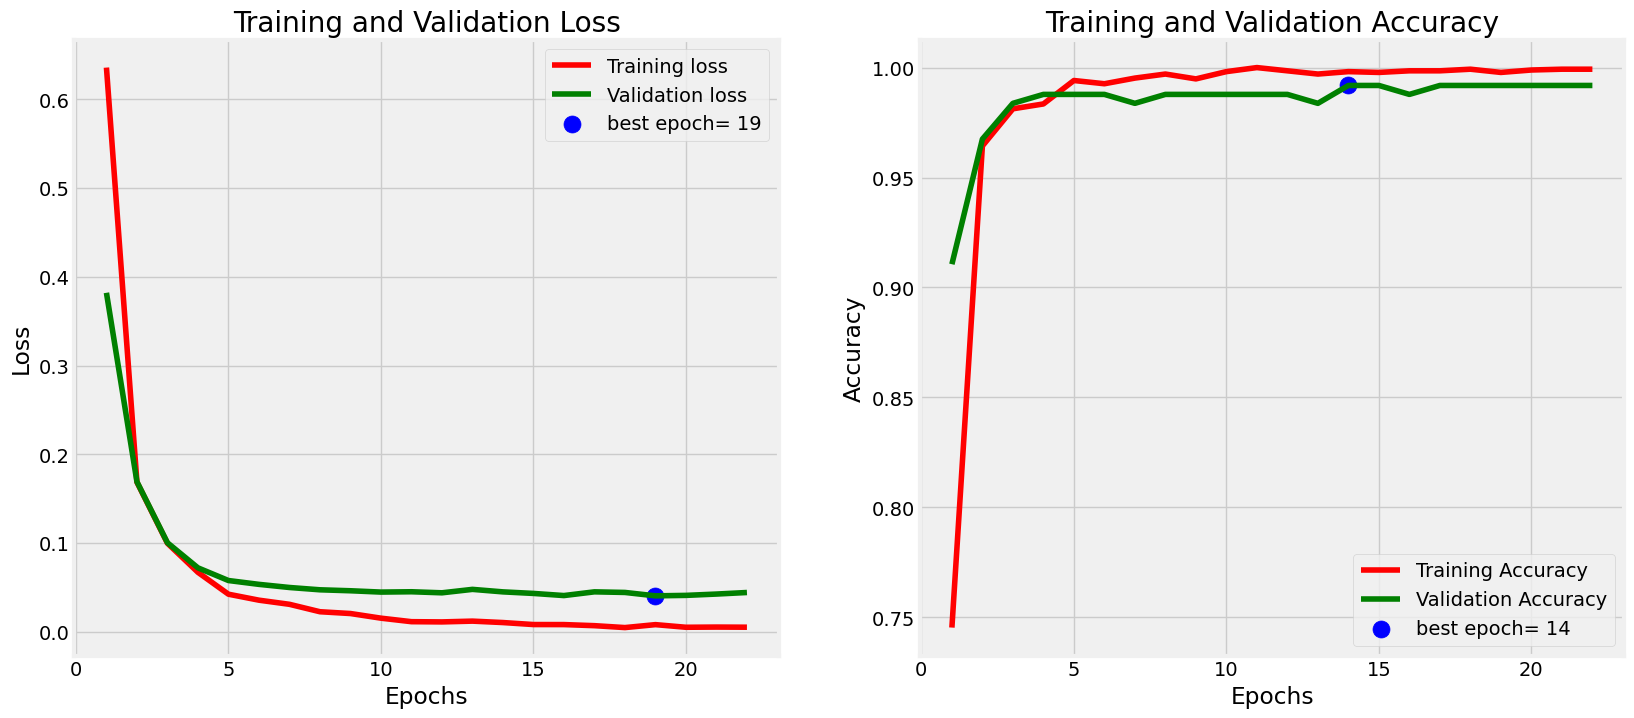

In [79]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

## PELATIHAN MODEL TERBAIK

In [81]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('val_accuracy') > 0.98:
            print("\nReached 98% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

checkpoint = ModelCheckpoint(
    filepath='best_model.keras',  
    monitor='val_accuracy',    
    save_best_only=True,       
    mode='max',                
    verbose=1
)

model.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(
    train_data,
    epochs=5,
    batch_size=32,
    verbose=1,
    validation_data=val_data,
    callbacks=[callbacks, checkpoint]
)


Epoch 1/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9978 - loss: 0.0062
Reached 98% accuracy so cancelling training!

Epoch 1: val_accuracy improved from -inf to 0.99187, saving model to best_model.keras
86/86 ━━━━━━━━━━━━━━━━━━━━ 240s 2s/step - accuracy: 0.9978 - loss: 0.0062 - val_accuracy: 0.9919 - val_loss: 0.0422


In [83]:
from tensorflow.keras.models import load_model
model = load_model('best_model.keras')
print("Model berhasil dimuat.")

def model_evaluation(model):
    train_score = model.evaluate(train_data, verbose= 1)
    valid_score = model.evaluate(val_data, verbose= 1)
    test_score = model.evaluate(test_data, verbose= 1)
    
    print("Train Loss: ", train_score[0])
    print("Train Accuracy: ", train_score[1])
    print('-' * 20)
    print("Validation Loss: ", valid_score[0])
    print("Validation Accuracy: ", valid_score[1])
    print('-' * 20)
    print("Test Loss: ", test_score[0])
    print("Test Accuracy: ", test_score[1])

Model berhasil dimuat.


In [85]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score

# Memuat model
model = load_model('best_model.keras')
print("Model berhasil dimuat.")

# Definisikan fungsi get_pred
def get_pred(model, test_data):
    preds = model.predict(test_data)
    y_pred = np.argmax(preds, axis=1)
    return y_pred

# Mengambil data tes (pastikan data ini sudah ada dan terformat dengan benar)
# Misalnya, jika Anda memiliki test_data yang sudah didefinisikan sebelumnya:
# test_data = ...

# Mengambil prediksi untuk data tes
y_pred = get_pred(model, test_data)

# Jika Anda memiliki label sebenarnya untuk data tes
# Misalnya: y_true = ... (load atau definisikan label tes Anda)

# Hitung akurasi atau metrik lain
# accuracy = accuracy_score(y_true, y_pred)
# print("Akurasi Model: ", accuracy)

# Jika Anda ingin melihat hasil prediksi
print("Hasil Prediksi: ", y_pred)

Model berhasil dimuat.
4/4 ━━━━━━━━━━━━━━━━━━━━ 37s 7s/step
Hasil Prediksi:  [0 0 0 1 1 0 2 1 1 2 2 1 2 2 2 2 2 2 1 1 2 0 2 0 0 1 1 0 0 1 0 2 1 1 0 0 2
 2 0 1 1 1 1 1 1 1 0 2 0 2 2 2 1 1 2 2 0 2 0 0 0 0 0 2 1 1 1 0 0 1 0 1 0 0
 2 2 0 2 2 0 2 2 1 2 1 1 2 1 0 2 0 1 2 0 2 0 1 2 1]


Model berhasil dimuat.
Found 2721 images belonging to 3 classes.


C:\Users\User\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


86/86 ━━━━━━━━━━━━━━━━━━━━ 176s 2s/step


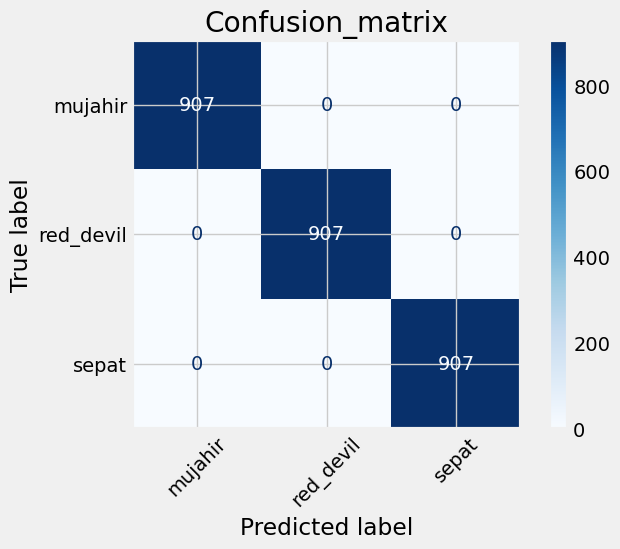

              precision    recall  f1-score   support

     mujahir       1.00      1.00      1.00       907
   red_devil       1.00      1.00      1.00       907
       sepat       1.00      1.00      1.00       907

    accuracy                           1.00      2721
   macro avg       1.00      1.00      1.00      2721
weighted avg       1.00      1.00      1.00      2721



In [89]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# 1. Memuat model
model = load_model('best_model.keras')
print("Model berhasil dimuat.")

# 2. Menyiapkan data uji
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_data = test_datagen.flow_from_directory(
    directory='processed_dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# 3. Memprediksi kelas
y_pred_probs = model.predict(test_data, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)

# 4. Mengambil label sebenarnya
y_true = test_data.classes
class_names = list(test_data.class_indices.keys())

# 5. Menampilkan matriks kebingungan
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
    plt.title('Confusion_matrix')
    plt.show()

plot_confusion_matrix(y_true, y_pred, class_names)

# 6. (Opsional) Tampilkan laporan klasifikasi
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)

Model berhasil dimuat.
Found 99 images belonging to 3 classes.


C:\Users\User\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 37s 7s/step


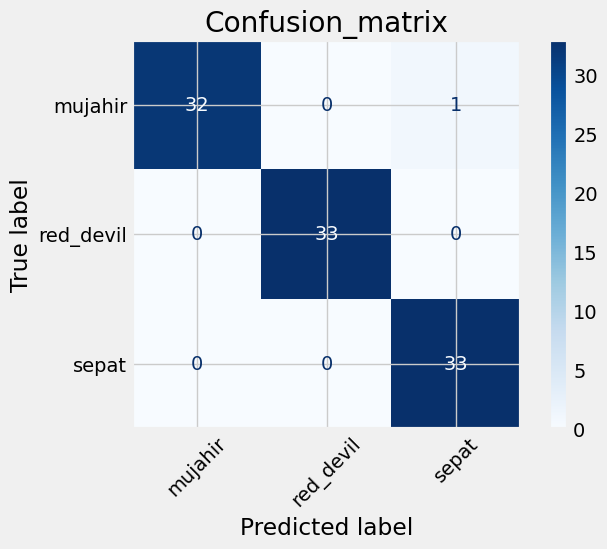

              precision    recall  f1-score   support

     mujahir       1.00      0.97      0.98        33
   red_devil       1.00      1.00      1.00        33
       sepat       0.97      1.00      0.99        33

    accuracy                           0.99        99
   macro avg       0.99      0.99      0.99        99
weighted avg       0.99      0.99      0.99        99



In [87]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# 1. Memuat model
model = load_model('best_model.keras')
print("Model berhasil dimuat.")

# 2. Menyiapkan data uji
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_data = test_datagen.flow_from_directory(
    directory='processed_dataset/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# 3. Memprediksi kelas
y_pred_probs = model.predict(test_data, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)

# 4. Mengambil label sebenarnya
y_true = test_data.classes
class_names = list(test_data.class_indices.keys())

# 5. Menampilkan matriks kebingungan
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
    plt.title('Confusion_matrix')
    plt.show()

plot_confusion_matrix(y_true, y_pred, class_names)

# 6. (Opsional) Tampilkan laporan klasifikasi
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)

Model berhasil dimuat.
Found 246 images belonging to 3 classes.


C:\Users\User\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 47s 4s/step


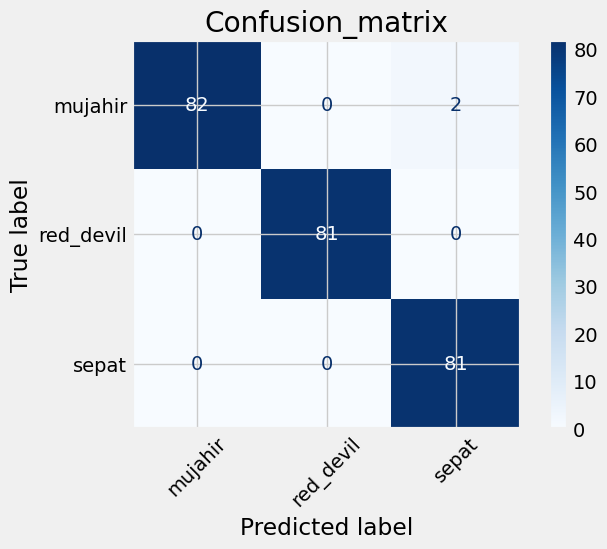

              precision    recall  f1-score   support

     mujahir       1.00      0.98      0.99        84
   red_devil       1.00      1.00      1.00        81
       sepat       0.98      1.00      0.99        81

    accuracy                           0.99       246
   macro avg       0.99      0.99      0.99       246
weighted avg       0.99      0.99      0.99       246



In [90]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# 1. Memuat model
model = load_model('best_model.keras')
print("Model berhasil dimuat.")

# 2. Menyiapkan data uji
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_data = test_datagen.flow_from_directory(
    directory='processed_dataset/valid',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# 3. Memprediksi kelas
y_pred_probs = model.predict(test_data, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)

# 4. Mengambil label sebenarnya
y_true = test_data.classes
class_names = list(test_data.class_indices.keys())

# 5. Menampilkan matriks kebingungan
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
    plt.title('Confusion_matrix')
    plt.show()

plot_confusion_matrix(y_true, y_pred, class_names)

# 6. (Opsional) Tampilkan laporan klasifikasi
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)

In [91]:
# Misalnya, jika Anda telah membuat test_data dengan ImageDataGenerator
class_labels = list(test_data.class_indices.keys())
print("Class Labels:", class_labels)

Class Labels: ['mujahir', 'red_devil', 'sepat']


Model berhasil dimuat.


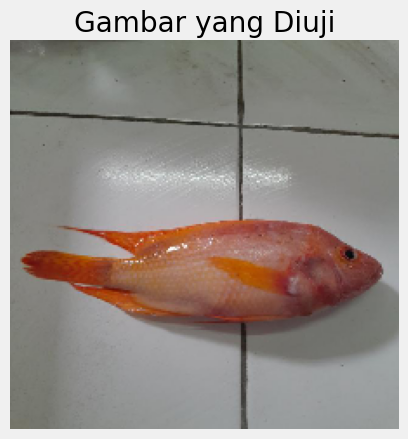

1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step
mujahir: 0.00%
red_devil: 100.00%
sepat: 0.00%

Hasil Prediksi: red_devil (100.00%)


In [111]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

# Memuat model
model = load_model('best_model.keras')
print("Model berhasil dimuat.")

# Path ke gambar lokal
image_path = 'D:/MATA KULIAH/Semester 5/PM/Project/FINAL PROJECT/project-PM-kel-05/new_data/Red-Devil-245_jpg.rf.bab234efe9095ffea84692b9267d2c37.jpg'

# Load dan preprocess gambar
img = load_img(image_path, target_size=(224, 224))  # Sesuaikan ukuran menjadi 224 x 224
img_array = img_to_array(img) / 255.0  # Normalisasi (0-1)
img_array = np.expand_dims(img_array, axis=0)  # Tambahkan batch dimension

# Menampilkan gambar
plt.imshow(img_array[0])  # Tampilkan gambar tanpa batch dimension
plt.axis('off')  # Nonaktifkan sumbu
plt.title("Gambar yang Diuji")
plt.show()

# Prediksi gambar
predictions = model.predict(img_array)

# Konversi probabilitas ke persentase
predicted_percentages = predictions[0] * 100  # Konversi ke persen

# Definisikan kelas secara manual
class_labels = ['mujahir', 'red_devil', 'sepat']  # Gantilah dengan nama kelas yang sesuai

# Menampilkan hasil
for i, label in enumerate(class_labels):
    print(f"{label}: {predicted_percentages[i]:.2f}%")

# Menampilkan kelas dengan probabilitas tertinggi
predicted_class = np.argmax(predictions, axis=1)
print(f"\nHasil Prediksi: {class_labels[predicted_class[0]]} ({predicted_percentages[predicted_class[0]]:.2f}%)")